In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!pip install -U scikit-learn

     |████████████████████████████████| 11.1 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 148.4 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 170.1 MB/s eta 0:00:01


# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.manifold import TSNE

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

# Data loading

In [2]:
f = open("./GSE123302_series_matrix.txt/GSE123302_series_matrix.txt", "r")

data = f.readlines()

header_str = data[69]
class_str = data[42]
matrix_str = data[70:-1]



In [3]:
header = header_str.replace("\"", "")
header = header.replace("\n", "")
header = header.replace("ID_REF\t", "")

header = header.split("\t")

header

['GSM3499537',
 'GSM3499538',
 'GSM3499539',
 'GSM3499540',
 'GSM3499541',
 'GSM3499542',
 'GSM3499543',
 'GSM3499544',
 'GSM3499545',
 'GSM3499546',
 'GSM3499547',
 'GSM3499548',
 'GSM3499549',
 'GSM3499550',
 'GSM3499551',
 'GSM3499552',
 'GSM3499553',
 'GSM3499554',
 'GSM3499555',
 'GSM3499556',
 'GSM3499557',
 'GSM3499558',
 'GSM3499559',
 'GSM3499560',
 'GSM3499561',
 'GSM3499562',
 'GSM3499563',
 'GSM3499564',
 'GSM3499565',
 'GSM3499566',
 'GSM3499567',
 'GSM3499568',
 'GSM3499569',
 'GSM3499570',
 'GSM3499571',
 'GSM3499572',
 'GSM3499573',
 'GSM3499574',
 'GSM3499575',
 'GSM3499576',
 'GSM3499577',
 'GSM3499578',
 'GSM3499579',
 'GSM3499580',
 'GSM3499581',
 'GSM3499582',
 'GSM3499583',
 'GSM3499584',
 'GSM3499585',
 'GSM3499586',
 'GSM3499587',
 'GSM3499588',
 'GSM3499589',
 'GSM3499590',
 'GSM3499591',
 'GSM3499592',
 'GSM3499593',
 'GSM3499594',
 'GSM3499595',
 'GSM3499596',
 'GSM3499597',
 'GSM3499598',
 'GSM3499599',
 'GSM3499600',
 'GSM3499601',
 'GSM3499602',
 'GSM34996

In [4]:
classes = class_str.replace("\"", "")
classes = classes.replace("\n", "")
classes = classes.replace("!Sample_characteristics_ch1\t", "")
classes = classes.replace("diagnosis: ", "")

classes = classes.split("\t")

classes

['ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'ASD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'Non-TD',
 'No

In [5]:
# for i in range(len(matrix_str)): matrix_str[i] = matrix_str[i].replace("\n", "")

matrix_str = [matrix_str[i].replace("\n", "") for i in range(len(matrix_str))]

header.insert(0,"ID")
df = []
string = ""
for i in range(len(matrix_str)):
  string = matrix_str[i]
  df.append(string.split("\t"))

df = pd.DataFrame(df)
df.columns = header
df.set_index('ID', inplace=True)

df

,GSM3499537,GSM3499538,GSM3499539,GSM3499540,GSM3499541,GSM3499542,GSM3499543,GSM3499544,GSM3499545,GSM3499546,...,GSM3499751,GSM3499752,GSM3499753,GSM3499754,GSM3499755,GSM3499756,GSM3499757,GSM3499758,GSM3499759,GSM3499760
ID,,,,,,,,,,,,,,,,,,,,,
16657436,6.59413,7.87068,8.24341,8.82145,7.28308,7.20000,9.23493,7.20748,7.42416,7.64885,...,7.89938,7.05351,6.51581,7.79333,8.15164,7.57387,7.53656,7.70415,7.49588,7.01858
16657440,5.93156,5.69836,5.51954,5.28161,5.78602,5.48469,5.81990,6.45421,5.99021,5.89918,...,5.89504,5.49660,4.94837,5.33726,5.31676,5.20505,5.13099,5.44787,5.49887,5.28380
16657445,3.15314,2.83453,3.95568,3.44626,3.32776,3.41798,2.64097,2.97989,3.29357,3.04085,...,3.37387,3.39238,2.42227,3.20146,2.70834,2.77802,2.93332,2.72043,2.45639,2.74394
16657447,3.65784,2.08780,2.41832,2.53530,4.08640,2.70086,2.23447,2.27813,2.21519,3.25745,...,2.62774,2.77415,2.07024,2.66232,2.26471,2.23681,2.42367,2.34175,2.62971,2.54580
16657450,11.64852,11.21240,11.29504,11.51345,11.52633,11.47545,11.52348,11.55696,11.58122,11.55579,...,10.73590,10.72824,10.30400,10.47405,10.01123,10.54521,10.68286,10.85129,10.71401,10.51731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17118442,1.95365,2.34992,2.10524,2.07298,2.13377,2.62745,1.92867,2.05897,2.21522,1.97885,...,1.93701,2.04299,2.28798,2.49042,2.53545,1.84912,2.31266,2.32737,1.81117,2.36651
17118444,3.45978,3.46852,3.83358,3.14549,3.38367,3.90132,4.14779,3.32573,4.16953,3.28960,...,2.93926,3.37738,3.19731,2.77683,3.08296,3.08644,3.61108,3.20853,3.53785,3.29566
17118446,2.80000,3.49701,2.79608,2.75074,3.52271,2.87528,2.80016,2.86922,3.18787,3.17068,...,2.86940,2.95610,2.73927,2.95253,2.69072,2.44357,2.66918,2.82318,2.50656,3.20161


In [6]:
df_t = df.transpose()
df_t.head()

ID,16657436,16657440,16657445,16657447,16657450,16657469,16657473,16657476,16657489,16657492,...,17118432,17118434,17118436,17118438,17118440,17118442,17118444,17118446,17118451,17118478
GSM3499537,6.59413,5.93156,3.15314,3.65784,11.64852,9.18746,4.59582,6.50885,5.50111,4.76784,...,6.36994,5.18167,6.14821,5.98637,3.89763,1.95365,3.45978,2.80000,3.44546,5.01391
GSM3499538,7.87068,5.69836,2.83453,2.08780,11.21240,8.69769,3.90464,6.17625,5.54039,4.40995,...,6.38951,4.71130,5.74481,6.17986,4.39488,2.34992,3.46852,3.49701,3.32475,5.10275
GSM3499539,8.24341,5.51954,3.95568,2.41832,11.29504,8.52116,3.85387,6.26045,4.82621,5.19215,...,6.06655,4.88073,5.45233,5.95467,4.39322,2.10524,3.83358,2.79608,3.43109,4.52188
GSM3499540,8.82145,5.28161,3.44626,2.53530,11.51345,8.72665,4.05922,5.95970,5.52619,4.58389,...,6.42090,5.08474,5.62217,5.78808,4.22873,2.07298,3.14549,2.75074,3.65670,5.14589
GSM3499541,7.28308,5.78602,3.32776,4.08640,11.52633,8.69042,4.29833,6.47306,4.79904,4.92781,...,6.17093,5.61961,5.27742,5.94552,3.71425,2.13377,3.38367,3.52271,3.40723,4.72626


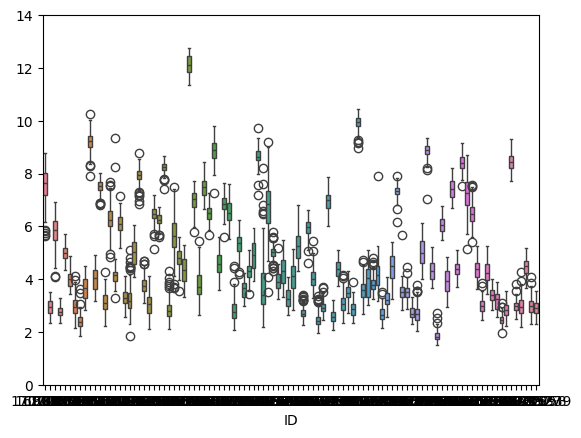

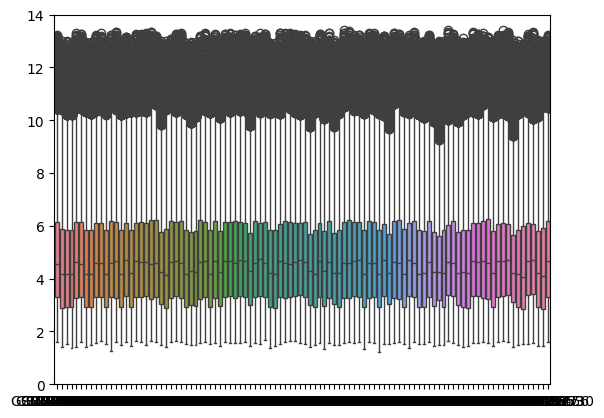

In [7]:
# plot dos atributos pre transformação
plot_df_atr = df_t.sample(100, axis='columns', random_state = 5).columns

sns.boxplot(data=df_t[plot_df_atr].astype("float64"))

plt.ylim(0,14)

plt.show()

#plot das instancias pré transformação
plot_df_ins = df.sample(100, axis='columns', random_state = 5).columns

sns.boxplot(data=df[plot_df_ins].astype("float64"))
plt.ylim(0,14)

plt.show()



# ------> Colocar legenda nas imagens

In [8]:
# transformação log2
transformed_df = np.log2(df_t.astype("float64") + 1.0)

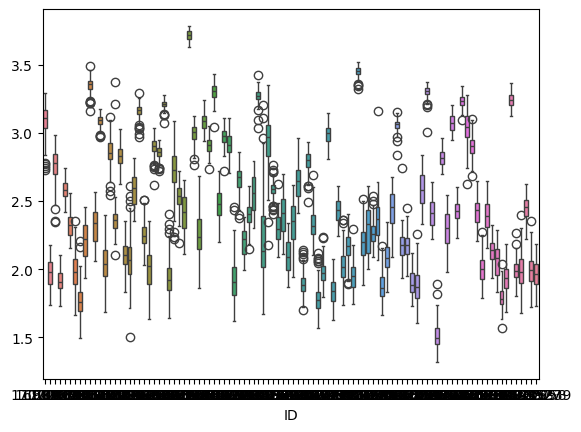

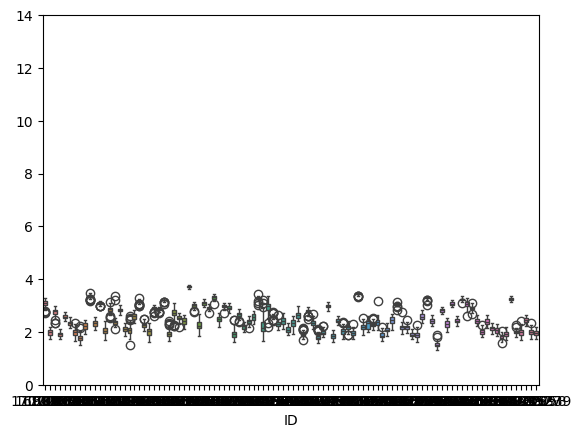

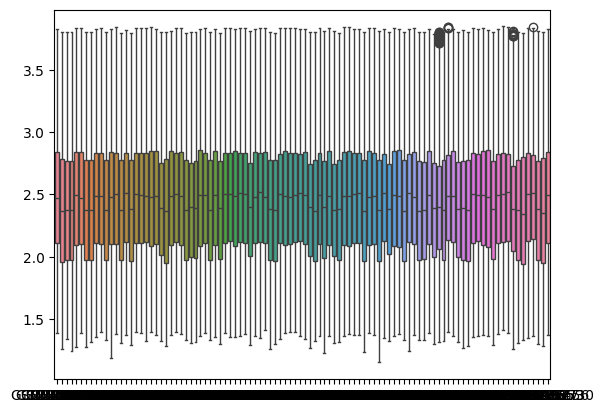

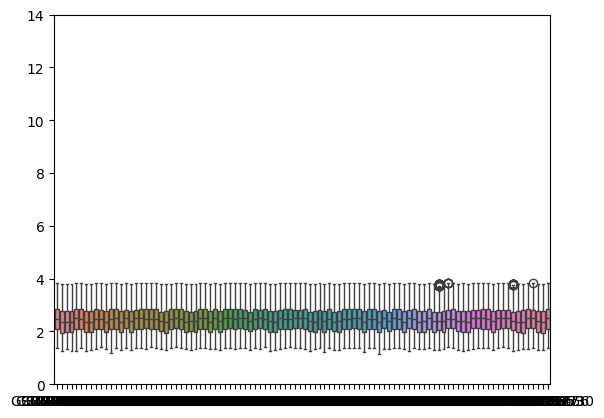

In [9]:
#plot dos atributos pós transformação
sns.boxplot(data=transformed_df[plot_df_atr].astype("float64"))
plt.show()

sns.boxplot(data=transformed_df[plot_df_atr].astype("float64"))
plt.ylim(0,14)

plt.show()

#plot das instancia pós transformação
sns.boxplot(data=transformed_df.transpose()[plot_df_ins].astype("float64"))
plt.show()

sns.boxplot(data=transformed_df.transpose()[plot_df_ins].astype("float64"))
plt.ylim(0,14)

plt.show()


transformed_df["Class"] = classes



# ------> Colocar legenda nas imagens

In [30]:
f2 = open("./GSE123302_family.soft", "r")

platform_table = []

data2 = f2.readlines()

platform_table_str = data2[309:54291]


platform_table = []
line = ""
for i in range(len(platform_table_str)):
  line = platform_table_str[i]
  platform_table.append(line.split("\t"))

platform_table = pd.DataFrame(platform_table)

platform_table.columns = platform_table.iloc[0]
platform_table = platform_table[1:]

platform_table

,ID,RANGE_STRAND,RANGE_START,RANGE_END,total_probes,GB_ACC,SPOT_ID,RANGE_GB\n
1,16657436,+,12190,13639,25,NR_046018,chr1:12190-13639,NC_000001.10\n
2,16657440,+,29554,31109,28,,chr1:29554-31109,NC_000001.10\n
3,16657445,+,69091,70008,8,,chr1:69091-70008,NC_000001.10\n
4,16657447,+,160446,161525,13,,chr1:160446-161525,NC_000001.10\n
5,16657450,+,317811,328581,36,NR_024368,chr1:317811-328581,NC_000001.10\n
...,...,...,...,...,...,...,...,...
53977,AFFX-r2-Ec-bioD-5_st,,,,,,--unknown,\n
53978,AFFX-r2-P1-cre-3_at,,,,,,--unknown,\n
53979,AFFX-r2-P1-cre-3_st,,,,,,--unknown,\n
53980,AFFX-r2-P1-cre-5_at,,,,,,--unknown,\n


In [38]:
filtered = platform_table.loc[platform_table['GB_ACC']!= '']

#filtered =

#filtered['GB_ACC'].startswith('NM')

#selecionar os com prefixo 'NM'
#df['TIDY'] = df['INVOICE NUMBER'].str.extractall(r'(SIN.{11})').unstack(fill_value='').apply(','.join, 1)

AttributeError: 'Series' object has no attribute 'startswith'

In [ ]:
# We want to get TSNE embedding with 2 dimensions
X = transformed_df.drop("Class", axis=1)
Y = classes

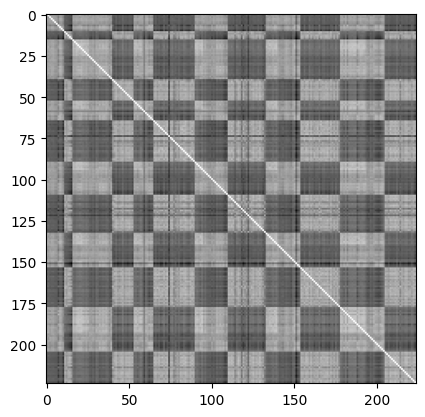

In [ ]:
from sklearn.metrics import pairwise_distances

distance_matrix = pairwise_distances(X,
                                     metric='euclidean')

plt.imshow(distance_matrix, 'Greys')

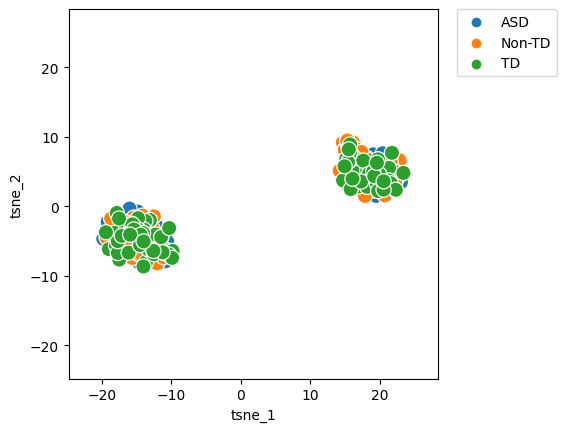

In [ ]:
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)

# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': Y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

Data pre-processing

In [ ]:
#separar por classe
#0 == desenvolvimento typico, 1 == desenvolvimento não-tipico
isTD = np.array([0 if y=='TD' else 1 for y in classes])

#0 == não TEA, 1 == TEA
isASD = np.array([1 if y=='ASD' else 0 for y in classes])

#dentro de desenvolvimento não-típico 0 == não TEA, 1 == TEA
NonTD_df = transformed_df[isTD == 1]
NonTD_isASD = np.array([1 if y=='ASD' else 0 for y in NonTD_df["Class"]])


("Nr Non-Tipical Development: " + str(len(transformed_df[isTD == 1])),
 "Nr ASD Development: " + str((len(transformed_df[isASD == 1]))))

('Nr Non-Tipical Development: 133', 'Nr ASD Development: 53')

In [ ]:
#nro de folds
K = 5

In [ ]:
#separar treino e teste
teste = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)

train_folds = []
test_folds = []

for i, (train_index, test_index) in enumerate(teste.split(transformed_df, isTD, n_splits=K)):

  train_folds.append(train_index)
  test_folds.append(test_index)

#train_folds

In [ ]:
#normalizar dados

def min_max_adapt(df_train, df_test, min_list, max_list):

  df_train_ret = np.empty(df_train.shape)
  df_test_ret = np.empty(df_test.shape)

  scaler = MinMaxScaler()
  df_train_ret = scaler.fit_transform(df_train)

  for i in range(df_test.shape[1]):
    min = scaler.data_min_[i]
    max = scaler.data_max_[i]

    row = [(x - min)/(max - min) for x in df_test[:,i]]

    df_test_ret[:,i] = row

  return df_train_ret, df_test_ret

In [ ]:
#feature selection


In [ ]:
#data augmentation


*models*

In [ ]:
for i in range(K):
  X_train = transformed_df.iloc(train_folds[i])
  X_test = transformed_df.iloc(test_folds[i])

  Y_train = X_train["Class"]
  Y_test = X_test["Class"]

  X_train = X_train.drop["Class"]
  X_test = X_test.drop["Class"]




In [ ]:
#nayve bayes

In [ ]:
#random forest

In [ ]:
#support vector machine

Validation